### Visualization of Bifurcations along Trainings Trajectory

In [1]:
using Plots#
using JLD2
using SCYFI
using BPTT
using CSV
using MultivariateStats
using NPZ
using LinearAlgebra
using LaTeXStrings


In [2]:
experiment_path = "BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/param_dict.jld2dynamical_objects2.jld2"
data_coarse=load(experiment_path)
# Add all points to a single vector so we can perform the PCA
points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    for j in eachindex(data_coarse["dynamical_objects"][i][1])
        try
            for k = 1:length(data_coarse["dynamical_objects"][i][1][j][1])
            push!(points,data_coarse["dynamical_objects"][i][1][j][1][k])
        end
        catch
            continue
        end
        
    end
end

M = fit(PCA, transpose(mapreduce(permutedims, vcat, points)); maxoutdim=1)

PCA(indim = 18, outdim = 1, principalratio = 0.94296825)

Pattern matrix (unstandardized loadings):
────────────────
             PC1
────────────────
1    0.00636606
2   -0.0012329
3    0.112424
4   -0.0729563
5    0.0404225
6    0.000827801
7   -0.0479628
8    0.0118925
9    0.00759237
10   0.00756228
11  -0.000487512
12   0.0974146
13  -0.0606396
14   0.0300302
15   0.0091584
16  -0.0637163
17   0.0119802
18  -0.0218091
────────────────

Importance of components:
────────────────────────────────────
                                 PC1
────────────────────────────────────
SS Loadings (Eigenvalues)  0.0410269
Variance explained         0.942968
Cumulative variance        0.942968
Proportion explained       1.0
Cumulative proportion      1.0
────────────────────────────────────

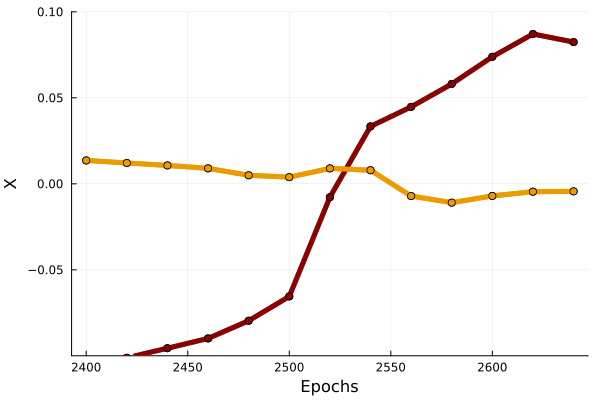

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\src\args.jl:1149
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\lukas.eisenmann\.julia\packages\Plots\sxUvK\

In [3]:
U = Plots.plot(legend=false)
m=240:2:265
T=10000

experiment_path = "BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/param_dict.jld2"
data=load(experiment_path)

color=["yellow","black","blue","grey","green","orange","magenta","yellowgreen","lightgreen","lightblue","darkgreen","pink","darkred","brown","darkorange","skyblue","orange2","pink2"]

for j=1:18
    list=[]
    for i = 1:13
        h_t=data["h_t"][m[i]][j]
        push!(list,points[i][j].+h_t)
    end
    Plots.plot!(U,m.*10,list,linewidth=5,ylims=(-0.1,0.1),marker=".",color=color[j])
end
xlabel!("Epochs")
ylabel!("X")
savefig("all_dim.png")
display(U)

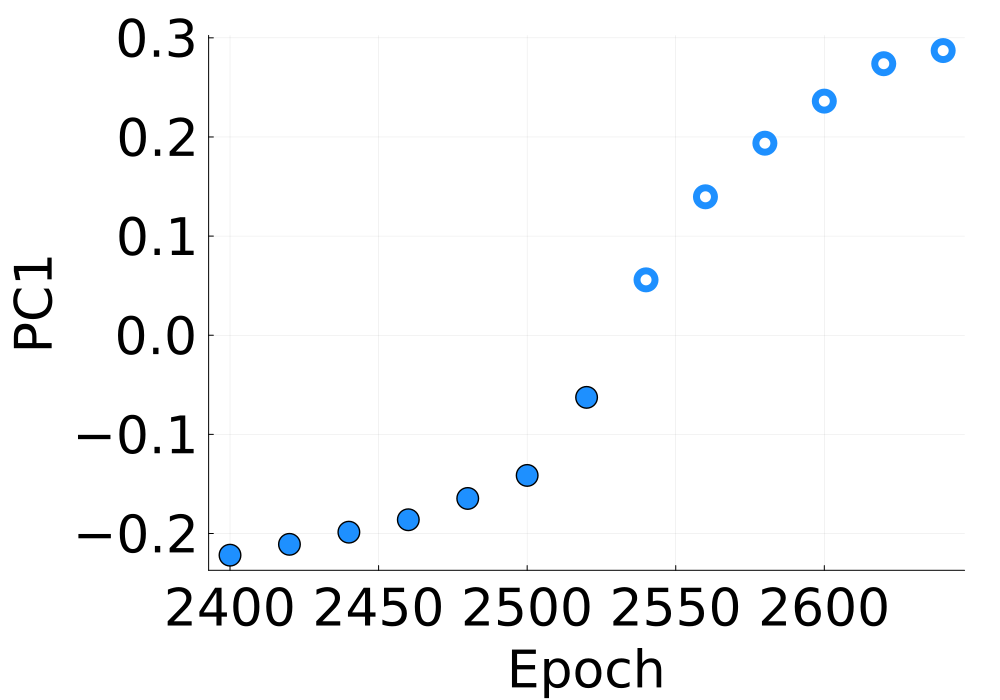

In [4]:
#pyplot()
bif_diag = Plots.plot(size=(1000,700),xtickfont=font(35), legend = false, 
ytickfont=font(35),xguidefontsize=35,yguidefontsize=35,legendfont=font(22),linewidth=3,margin=7Plots.mm)

# plot all points after mapping them on PC1
x_coarse=2400:20:2650
x_fine=280:5:400
points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    for j in eachindex(data_coarse["dynamical_objects"][i][1])
        try
            for k = 1:length(data_coarse["dynamical_objects"][i][1][j][1])
                if all(abs.(data_coarse["dynamical_objects"][i][2][j][1]) .< 1)
                #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                    scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][1][k]),m=12,color="dodgerblue",markershape=:circle)
                    
                else
                    scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][1][k]),color="red",m = (10, :white, stroke(5, "dodgerblue")))
                    
                end
            end

        catch
            continue
        end
        
    end
end
#plot!([2500,2500],[-0.25,0.3],color="grey",linewidth=8,ylims=(-0.25,0.3),linestyle=:dash)
#plot!([2560,2560],[-0.25,0.3],color="grey",linewidth=8,ylims=(-0.25,0.3),linestyle=:dash)
xlabel!("Epoch")
ylabel!("PC1")
savefig(bif_diag,"BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/bif_diag.png")
display(bif_diag)

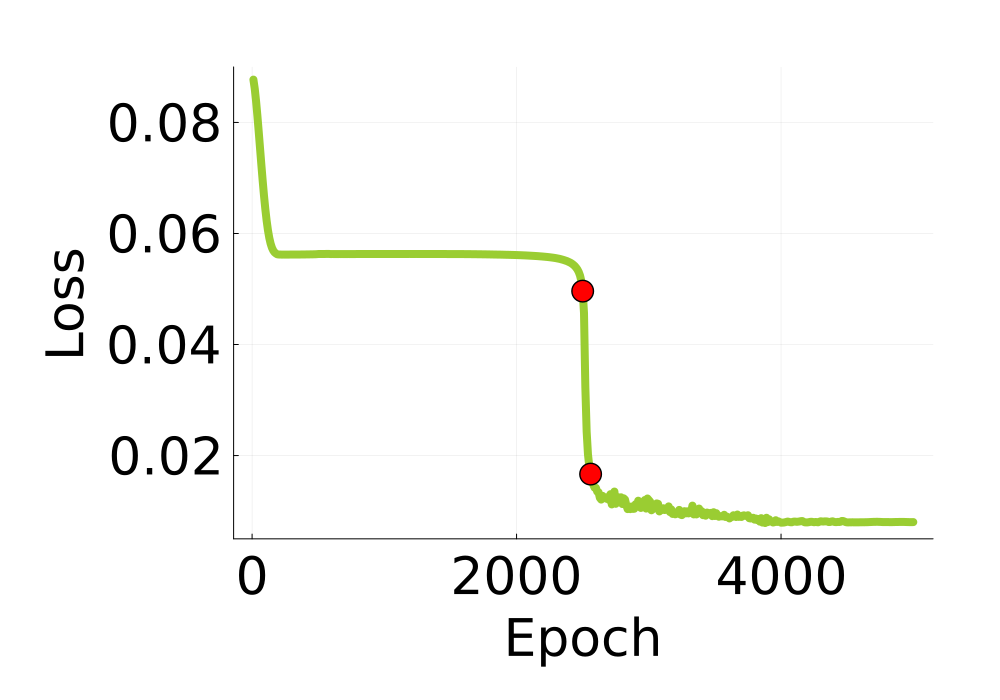

In [5]:
loss = CSV.File("BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/run-M09B02tau75T500_002-tag-Loss.csv")

loss_plot = Plots.plot(size=(1000,700),xtickfont=font(35), legend = false, 
ytickfont=font(35),xguidefontsize=35,yguidefontsize=35,legendfont=font(22),linewidth=3,margin=15Plots.mm)


plot!(loss_plot,loss["Step"],loss["Value"],linewidth=8,xticks=[0,2000,4000],color="yellowgreen")
scatter!([2500],[loss["Value"][250]],color="red",linewidth=8,ylims=(0.005,0.09),m=12)
scatter!([2560],[loss["Value"][256]],color="red",linewidth=8,ylims=(0.005,0.09),m=12)

xlabel!("Epoch")
ylabel!("Loss")
savefig(loss_plot,"BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/loss_plot.png")
display(loss_plot)

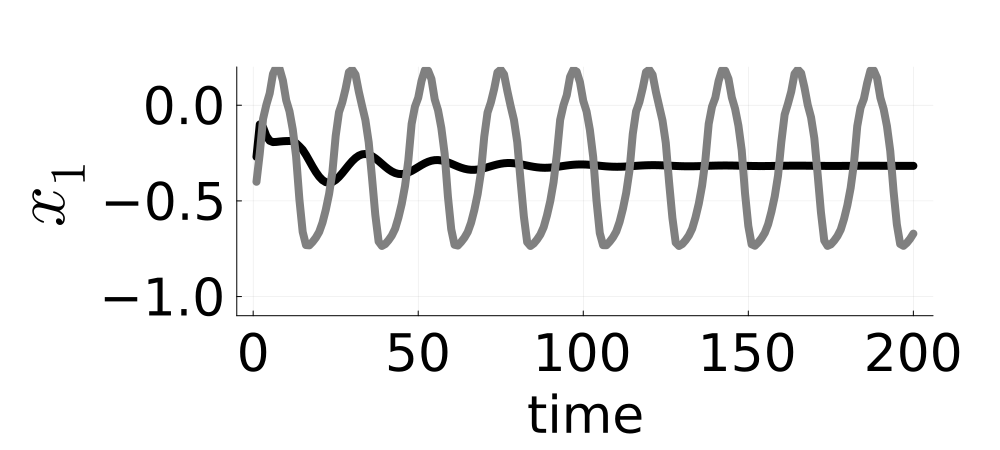

[0.4314134136036215, 0.6520184278095326, 1.2476159455233355, -1.621508340200093, 0.30200244651074204, -2.00472903594247, -0.3644700207610399, 1.650776759826165, -0.43061197893105185, 0.5006932279526918, 0.28570166058904484, 0.23041645596263574, -2.2114860525553417, -0.12026892463572124, -1.331728311425474, -1.5048945162256335, -1.7449623100926852, -0.5894362608186671]


In [6]:
m=250
T=10000

experiment_path = "BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/param_dict.jld2"
data=load(experiment_path)

GT_path ="BN TypeIcell/BN_single_spike_downsampled.npy"
gt=npzread(GT_path)

A=diagm(data["A"][m])
W=data["W"][m]
h=data["h"][m]
h_t=data["h_t"][m]
z =randn(18,)

Z = zeros(18,T)./10

Z[:,1] = z
println((Z[:,1]))
for t = 2:T
    z = A*Z[:,t-1] + W*max.(0,Z[:,t-1]) + h
    Z[:,t] = z
end

traj_bef_plot = Plots.plot(size=(1000,700),xtickfont=font(30), legend = false, 
ytickfont=font(30),xguidefontsize=30,yguidefontsize=30,legendfont=font(22),linewidth=3,margin=15Plots.mm)


plot_1 =Plots.plot()
Plots.plot!(plot_1,Z[1,begin:200].+h_t[1],linewidth=8,color="black")
Plots.plot!(plot_1,gt[begin:200,1],linewidth=8,ylims=(-1.1,0.2),yticks=[-1.0,-0.5,0],color="grey")
ylabel!(L"$x_1$")
plot_2 =Plots.plot()
Plots.plot!(plot_2,Z[2,begin:200].+h_t[2],linewidth=8)
Plots.plot!(plot_2,gt[begin:200,2],linewidth=8,ylims=(0.2,0.6),color="grey")
ylabel!(L"$x_2$")

traj_bef_plot = Plots.plot!(plot_1,layout=(2,1),xtickfont=font(35), legend = false, 
ytickfont=font(35),xguidefontsize=35,yguidefontsize=48,size=(1000,450),margin=15Plots.mm,bottom_margin=16Plots.mm)
xlabel!("time")
savefig(traj_bef_plot,"BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/traj_bef_plot.png")
display(traj_bef_plot)

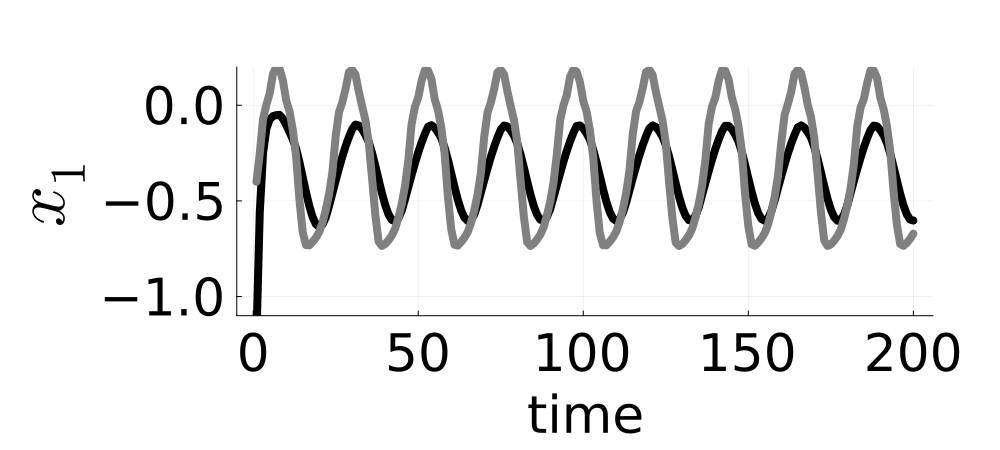

[-0.5085881524689502, 0.6770526431699657, -0.5053696256130467, -0.12067509821664713, -1.1363918182686792, 0.8128862533918813, -0.5807680319796426, -0.6218152412670447, -1.0504974137917777, -0.8143319903396882, 1.1731277822055783, -1.6328814787740829, -0.20011888299596112, 1.092733038170198, -1.2919929107069836, -0.5030249585134633, 0.2968956697334145, -0.14446069812000048]


In [42]:
m=256
T=10000

experiment_path = "BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/param_dict.jld2"
data=load(experiment_path)

GT_path ="BN TypeIcell/BN_single_spike_downsampled.npy"
gt=npzread(GT_path)

A=diagm(data["A"][m])
W=data["W"][m]
h=data["h"][m]
h_t=data["h_t"][m]
z =randn(18,)

Z = zeros(18,T)./10

Z[:,1] = z
println((Z[:,1]))
for t = 2:T
    z = A*Z[:,t-1] + W*max.(0,Z[:,t-1]) + h
    Z[:,t] = z
end

traj_bef_plot = Plots.plot(size=(1000,700),xtickfont=font(35), legend = false, 
ytickfont=font(30),xguidefontsize=30,yguidefontsize=30,legendfont=font(22),linewidth=3,margin=15Plots.mm)


plot_1 =Plots.plot()
Plots.plot!(plot_1,Z[1,begin:200].+h_t[1],linewidth=8,color="black")
Plots.plot!(plot_1,gt[begin:200,1],linewidth=8,ylims=(-1.1,0.2),yticks=[-1.0,-0.5,0],color="grey")
ylabel!(L"$x_1$")
plot_2 =Plots.plot()
Plots.plot!(plot_2,Z[2,begin:200].+h_t[2],linewidth=8)
Plots.plot!(plot_2,gt[begin:200,2],linewidth=8,ylims=(-0.1,0.7),color="grey")
ylabel!(L"$x_2$")

traj_aft_plot = Plots.plot!(plot_1,layout=(2,1),xtickfont=font(35), legend = false, 
ytickfont=font(35),xguidefontsize=35,yguidefontsize=48,size=(1000,450),margin=15Plots.mm,bottom_margin=16Plots.mm)
xlabel!("time")
savefig(traj_aft_plot,"BN/single_spike_downsampled_high_prec/M09B02tau75T500/002/traj_aft_plot.png")
display(traj_aft_plot)